In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib as mpl

In [2]:
fireDf = pd.read_csv("filtered_data/FireData19_23.csv")
popDf = pd.read_csv("filtered_data/Gu_populations.csv")
forPopDf = pd.read_csv("filtered_data/Gu_Foreign_Populations.csv")

In [3]:
print(mpl.get_cachedir())
plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False

C:\Users\조예성\.matplotlib


In [4]:
fireCntDf = fireDf.groupby('SGG_NM').size().reset_index(name = '화재건수')
fireCntDf = fireCntDf.rename(columns={'SGG_NM':'구명'})
popDf.rename(columns = {'총생활인구수':'국내생활인구'}, inplace=True)
forPopDf.rename(columns = {'총생활인구수':'외국인생활인구'}, inplace = True)
popSumDf = pd.merge(popDf[['구명','국내생활인구']], forPopDf[['구명','외국인생활인구']], on='구명', how = 'inner')
mergedDf = pd.merge(fireCntDf, popSumDf, how='inner')

In [5]:
mergedDf['국내생활인구']=mergedDf['국내생활인구'].astype(int)
mergedDf['외국인생활인구']=mergedDf['외국인생활인구'].astype(int)
mergedDf['총생활인구'] = mergedDf['국내생활인구']+mergedDf['외국인생활인구']

mergedDf.head()

,구명,화재건수,국내생활인구,외국인생활인구,총생활인구
0,강남구,2093,655545,14829,670374
1,강동구,1051,509888,8714,518602
2,강북구,854,287913,6363,294276
3,강서구,1263,526891,9146,536037
4,관악구,1375,450404,20923,471327


In [6]:
mergedDf['화재비율 (1만명당)'] = (mergedDf['화재건수'] / mergedDf['총생활인구']) * 10000
mergedDf.head()

,구명,화재건수,국내생활인구,외국인생활인구,총생활인구,화재비율 (1만명당)
0,강남구,2093,655545,14829,670374,31.221378
1,강동구,1051,509888,8714,518602,20.266023
2,강북구,854,287913,6363,294276,29.020375
3,강서구,1263,526891,9146,536037,23.561806
4,관악구,1375,450404,20923,471327,29.172952


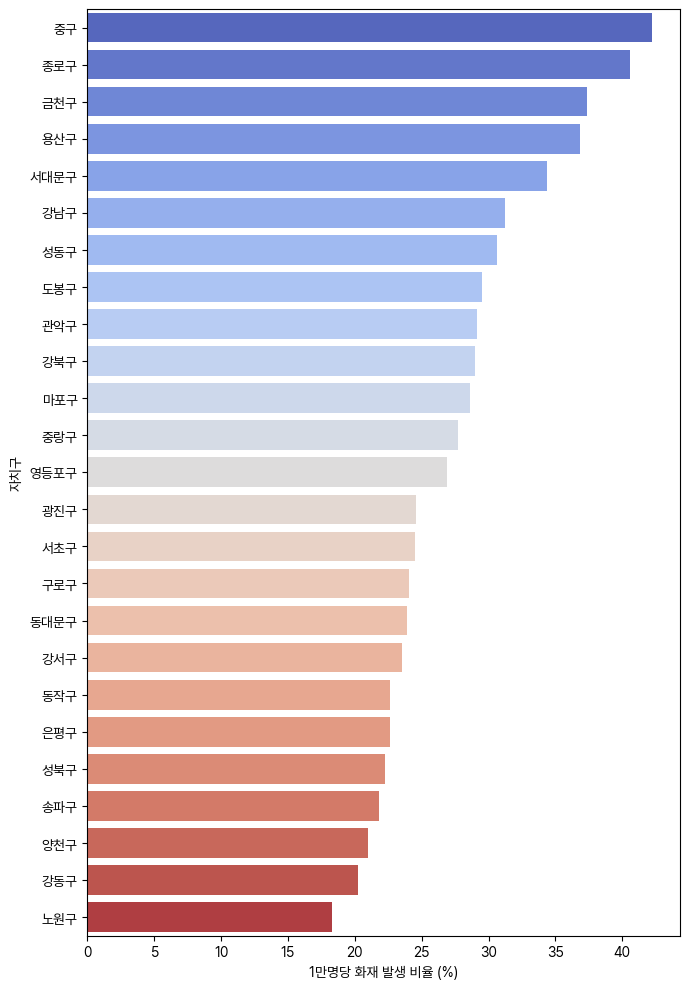

In [8]:
mergedDf.sort_values(by='화재비율 (1만명당)', ascending=False, inplace=True)

plt.figure(figsize=(7, 10))
sns.barplot(data=mergedDf, x='화재비율 (1만명당)', y='구명', hue = '구명',legend=False, palette='coolwarm')
plt.xlabel('1만명당 화재 발생 비율 (%)')
plt.ylabel('자치구')
plt.tight_layout()
plt.savefig('imgs/화재발생비율.png', dpi=300)
plt.show()
